<center><h1> Projet Machine learning</h1></center>
<center><h2> Breast Cancer Diagnosis Classification Using ML Models
</h2></center>

**Etape1. Collecte et Exploration des Données :**

1.1. Charger le dataset

In [ ]:
#Importation du bibliotéques
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
#Telécharger la DataSet à partir d'un fichier Csv
df = pd.read_csv('Breast Cancer Wisconsin (Diagnostic) Data.csv')

1.2 explorer les caractéristiques du DataSet

In [ ]:
#Afficher les 5 premier lignes
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#Afficher les 5 dernier lignes
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [ ]:
#Afficher des informations sur le dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
#Afficher un résumé statistique des caractéristiques numériques
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


2 Visualiser les relations entre les caractéristiques et les classes de tumeurs

In [ ]:
# Extraction des variables explicatives (X) et de la variable cible (y)
X = df.iloc[:, 2:-1]  # Sélectionnez les colonnes de la 2e à l'avant-dernière
y = df['diagnosis']

# Conversion des valeurs de la variable cible en numériques
label_encoder = LabelEncoder()
df["diagnosis"] = label_encoder.fit_transform(df["diagnosis"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

2.1 Visualisation des relations entre les caractéristiques

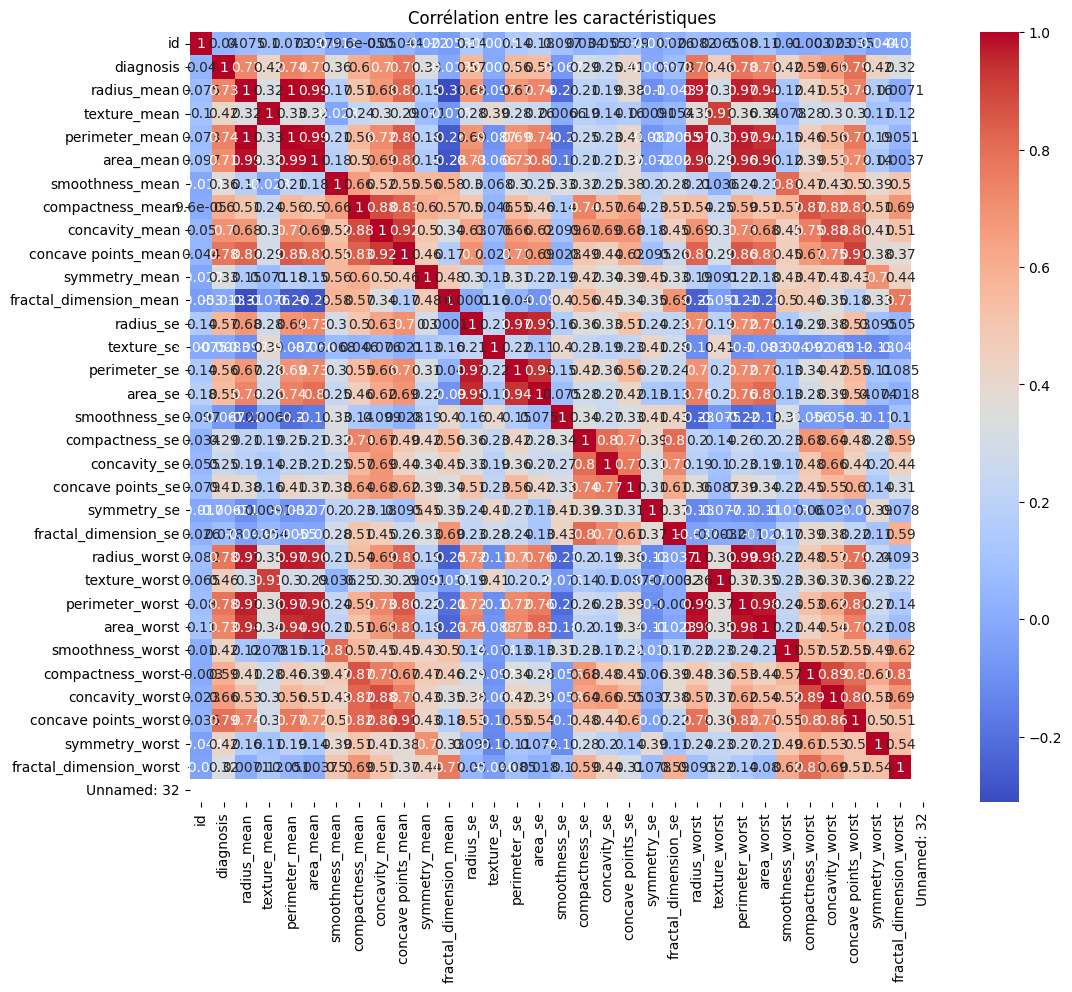

In [ ]:
# Visualisation des relations entre les caractéristiques et les classes de tumeurs
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Corrélation entre les caractéristiques")
plt.show()

2.2 Visualiser les relations entre les classes

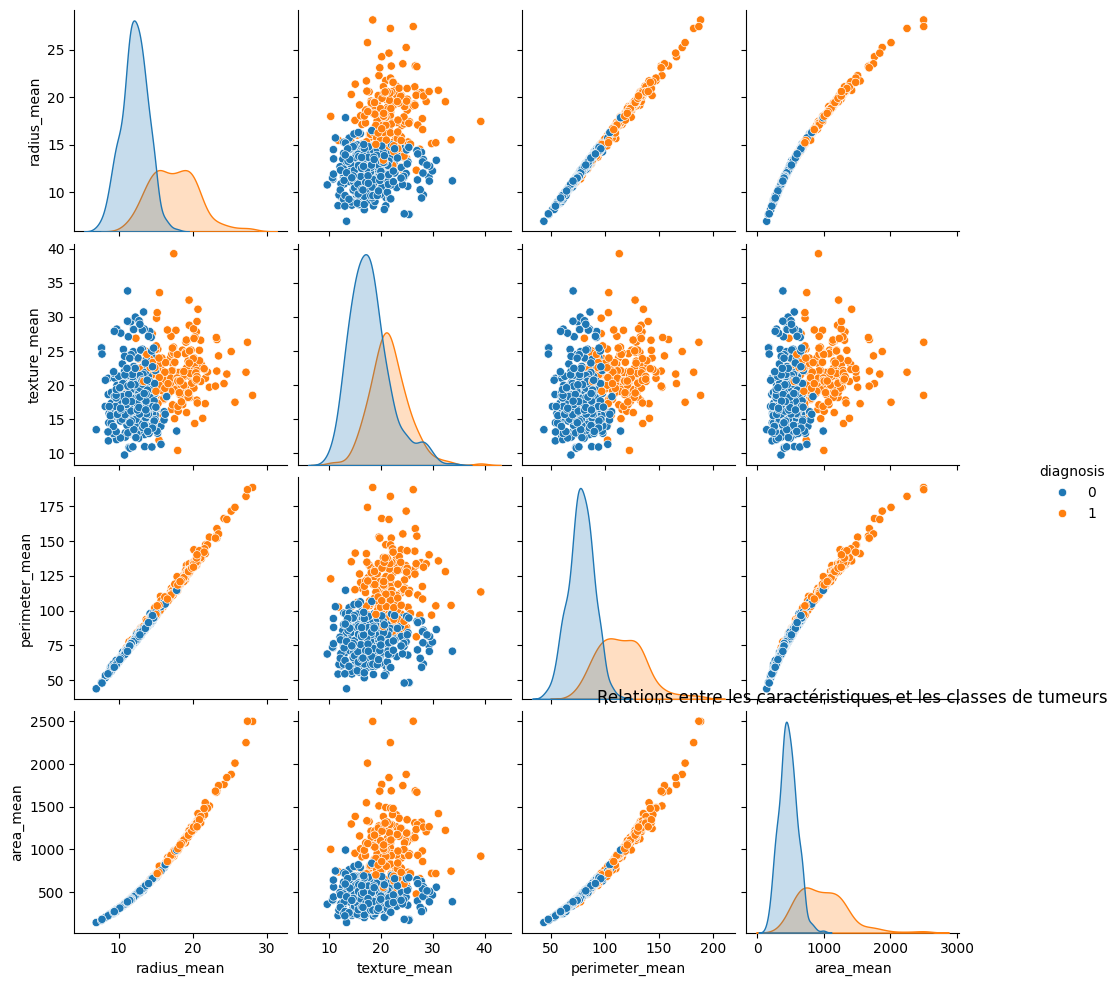

In [ ]:
sns.pairplot(df, hue="diagnosis", vars=["radius_mean", "texture_mean", "perimeter_mean", "area_mean"])
plt.title("Relations entre les caractéristiques et les classes de tumeurs")
plt.show()

**Etape2. Prétraitement des Données :**


1.1 Vérifier s'il y a des valeurs manquantes

In [ ]:
# Vérifier les valeurs manquantes
print(df.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

1.2 Vérifier s'il y a des valeurs aberrantes.


In [ ]:
# Vérification des valeurs aberrantes
print(df.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

In [ ]:
# Suppression des lignes contenant des valeurs manquantes
df = df.dropna()

# Suppression d'une colonne spécifique contenant des valeurs aberrantes
df = df.drop('Unnamed: 32', axis=1)

2. Normaliser les données

In [ ]:
from sklearn.preprocessing import MinMaxScaler

df = df.drop("Unnamed: 32", axis=1)
columns_to_normalize = df.columns[2:]
scaler = MinMaxScaler()

df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

**Etape3. Construction des Modèles :**

1. *Choix des Algorithmes de Classification*

A : Régression Logistique

B : K-plus Proches Voisins (KNN)

C : Arbres de Décision

D : Machines à Vecteurs de Support (SVM)

2 : Division des Données

In [ ]:
# Importer les modèles de classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Diviser les données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split

# Extraction des variables explicatives (X) et de la variable cible (y)
X = df.iloc[:, 2:-1]  # Sélectionnez les colonnes de la 2e à l'avant-dernière
y = df['diagnosis']

# Conversion des valeurs de la variable cible en numériques
label_encoder = LabelEncoder()
df["diagnosis"] = label_encoder.fit_transform(df["diagnosis"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Instanciez les modèles
logistic_regression = LogisticRegression()
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier()
svm = SVC()

**Etape4. Entraînement des Modèles :**

 1. Entraînement des modèles sur l'ensemble d'entraînement.

A. Régression Logistique

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialisation du modèle
logistic_regression = LogisticRegression()

# Entraînement du modèle
logistic_regression.fit(X_train, y_train)

LogisticRegression()

B. K-plus Proches Voisins (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialisation du modèle
knn_model = KNeighborsClassifier(n_neighbors=5)

# Entraînement du modèle
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

C. Arbres de Décision

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialisation du modèle
tree_model = DecisionTreeClassifier()

# Entraînement du modèle
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

D. Machines à Vecteurs de Support (SVM)

In [ ]:
from sklearn.svm import SVC

# Initialisation du modèle
svm_model = SVC(kernel='linear')

# Entraînement du modèle
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

2. Optimisation des hyperparamètres

Pour l'optimisation des hyperparamètres. en utilisant la recherche sur grille (GridSearchCV)

In [ ]:
from sklearn.model_selection import GridSearchCV
# Régression logistique
logistic_regression = LogisticRegression()
logistic_regression_params = {'C': [0.1, 1, 10]}  # Exemple de valeurs pour le paramètre de régularisation C
logistic_regression_grid = GridSearchCV(logistic_regression, logistic_regression_params)
logistic_regression_grid.fit(X_train, y_train)

# K-plus proches voisins (KNN)
knn = KNeighborsClassifier()
knn_params = {'n_neighbors': [3, 5, 7]}  # Exemple de valeurs pour le nombre de voisins
knn_grid = GridSearchCV(knn, knn_params)
knn_grid.fit(X_train, y_train)

# Arbres de décision
decision_tree = DecisionTreeClassifier()
decision_tree_params = {'max_depth': [None, 5, 10]}  # Exemple de valeurs pour la profondeur maximale
decision_tree_grid = GridSearchCV(decision_tree, decision_tree_params)
decision_tree_grid.fit(X_train, y_train)

# Machines à vecteurs de support (SVM)
svm = SVC()
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}  # Exemple de valeurs pour le paramètre de régularisation C et le noyau
svm_grid = GridSearchCV(svm, svm_params)
svm_grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']})

**Etape5. Évaluation des Modèles:**

1. Prédictions et Évaluation

In [ ]:
# Évaluation des modèles avec les meilleurs paramètres
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
print("Régression Logistique:")
y_pred_lr = logistic_regression_grid.best_estimator_.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}")
print(classification_report(y_test, y_pred_lr))

print("KNN:")
y_pred_knn = knn_grid.best_estimator_.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(classification_report(y_test, y_pred_knn))

print("Arbres de Décision:")
y_pred_dt = decision_tree_grid.best_estimator_.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print(classification_report(y_test, y_pred_dt))

print("SVM:")
y_pred_svm = svm_grid.best_estimator_.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(classification_report(y_test, y_pred_svm))

Régression Logistique:
Accuracy: 0.9473684210526315
              precision    recall  f1-score   support

           B       0.95      0.97      0.96        72
           M       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

KNN:
Accuracy: 0.956140350877193
              precision    recall  f1-score   support

           B       0.94      1.00      0.97        72
           M       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

Arbres de Décision:
Accuracy: 0.9035087719298246
              precision    recall  f1-score   support

           B       0.92      0.93      0.92        72
           M       0.88      0.86      0.87        42

    accuracy                           0.90     

 **Comparaison** : la régression logistique semble être le modèle le plus performant pour ce jeu de données, suivi de près par le KNN et les SVM.

 **Etape6. Interprétation des Résultats :**

 A. Régression Logistique

In [ ]:
# Coefficients du modèle de régression logistique
coefficients = logistic_regression_grid.best_estimator_.coef_[0]
features = X.columns

importance = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
importance = importance.reindex(importance.Coefficient.abs().sort_values(ascending=False).index)

print("Caractéristiques les plus importantes pour la régression logistique:")
print(importance)

Caractéristiques les plus importantes pour la régression logistique:
                   Feature  Coefficient
21           texture_worst     5.306729
20            radius_worst     5.019641
22         perimeter_worst     4.421630
27    concave points_worst     4.188780
7      concave points_mean     4.048535
23              area_worst     3.838403
24        smoothness_worst     3.681220
28          symmetry_worst     3.392076
0              radius_mean     3.204862
2           perimeter_mean     3.124717
3                area_mean     2.934292
10               radius_se     2.899925
6           concavity_mean     2.866732
26         concavity_worst     2.790010
1             texture_mean     2.519166
15          compactness_se    -2.290592
12            perimeter_se     2.035558
13                 area_se     1.851004
9   fractal_dimension_mean    -1.485217
19    fractal_dimension_se    -1.231610
4          smoothness_mean     1.101084
5         compactness_mean    -0.782880
14         

B. Arbres de Décision

In [ ]:
# Importance des caractéristiques pour l'arbre de décision
importances = decision_tree_grid.best_estimator_.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Caractéristiques les plus importantes pour l'arbre de décision:")
print(feature_importance_df)

Caractéristiques les plus importantes pour l'arbre de décision:
                   Feature  Importance
22         perimeter_worst    0.719238
27    concave points_worst    0.136685
21           texture_worst    0.051750
7      concave points_mean    0.022017
16            concavity_se    0.018226
4          smoothness_mean    0.017182
14           smoothness_se    0.014175
23              area_worst    0.009343
20            radius_worst    0.008269
13                 area_se    0.003114
26         concavity_worst    0.000000
25       compactness_worst    0.000000
24        smoothness_worst    0.000000
19    fractal_dimension_se    0.000000
18             symmetry_se    0.000000
17       concave points_se    0.000000
0              radius_mean    0.000000
15          compactness_se    0.000000
1             texture_mean    0.000000
12            perimeter_se    0.000000
11              texture_se    0.000000
10               radius_se    0.000000
9   fractal_dimension_mean    0.000000


**Remarque** : Pour les modèles KNN et SVM, il est plus difficile d'interpréter les caractéristiques les plus importantes directement à partir du modèle.

**Etape7 :  Déploiement et Utilisation :**

1. Installation des bibliothèques nécessaires :


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
df = pd.read_csv("Breast Cancer Wisconsin (Diagnostic) Data.csv")
df = df.drop(columns=['Unnamed: 32'])
df = df[df['diagnosis'].isin(['B', 'M'])]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['diagnosis'])
X = df.drop(columns=['id', 'diagnosis'])
non_numeric_columns = X.select_dtypes(include=['object']).columns
if not non_numeric_columns.empty:
    X[non_numeric_columns] = X[non_numeric_columns].apply(pd.to_numeric, errors='coerce')
X = X.fillna(X.mean())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
!pip install flask-ngrok

In [ ]:
from flask_ngrok import run_with_ngrok

app = Flask(__name__)
run_with_ngrok(app)

@app.route('/')
def home():
    return render_template('projet.html')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    mean_radius = float(data['mean_radius'])
    mean_texture = float(data['mean_texture'])
    # Normalisez les données si nécessaire
    # Effectuez la prédiction
    prediction = lr.predict([[mean_radius, mean_texture]])
    if prediction[0] == 0:
        result = "Le diagnostic prédit est: Bénigne"
    else:
        result = "Le diagnostic prédit est: Maligne"
    return result

if __name__ == '__main__':
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-11:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 8